   Price  Advertising_Expenditures  Competitor_Product_Presence  \
0     10                       100                            1   
1     12                       120                            0   
2     14                       140                            1   
3     16                       160                            0   
4     18                       180                            1   

   Sales_Quantity  
0             100  
1             120  
2             110  
3             130  
4             100  
Mean Squared Error (MSE): 59.078830437152476
Katsayılar: [  1.30996098   0.13007804 -10.2467294 ]


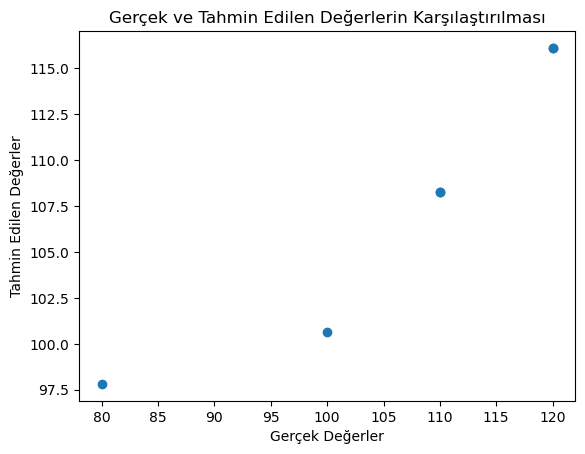

In [1]:
# Gerekli kütüphanelerin import edilmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Veriyi excel formatında import etme
data = pd.read_excel('/Users/mustafacitak/Desktop/Python/ML/Regression/MR_Dataset.xlsx')

# "Competitor_Product_Presence" sütunundaki "Yes" ve "No" değerlerini 1 ve 0'a dönüştürme
data['Competitor_Product_Presence'] = data['Competitor_Product_Presence'].map({'Yes': 1, 'No': 0})

# Verinin ilk 5 satırını görselleştirme
print(data.head())

# Bağımsız değişkenlerin belirlenmesi
X = data[['Price', 'Advertising_Expenditures', 'Competitor_Product_Presence']]

# Bağımlı değişkenin belirlenmesi
y = data['Sales_Quantity']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Çoklu regresyon modelini kurma
model = LinearRegression()

# Modeli eğitme
model.fit(X_train, y_train)

# Modeli test etme
y_pred = model.predict(X_test)

# Modelin performansını değerlendirme (MSE hesaplama)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Modelin katsayıları
coefficients = model.coef_
print('Katsayılar:', coefficients)

# "Price" ile "Advertising_Expenditures" arasındaki ilişkinin anlamlılığını değerlendirme
# Hipotez testi yapılabilir veya katsayıların p değerleri incelenebilir

# Tahmin edilen değerlerle gerçek değerleri karşılaştırarak bir grafik oluşturma
plt.scatter(y_test, y_pred)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Karşılaştırılması')
plt.show()